In [1]:
import pandas as pd
from IPython.display import display
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./data/results.csv")

In [3]:
display(df)

,model,audio,duration,duration_after_vad,time,wer,wil,wip,mer
0,tiny,audio.mp3,32.576000,30.320000,1.240256,0.444444,0.587762,0.412238,0.428571
1,tiny,audio2.mp3,9.130688,8.090687,0.437236,0.666667,0.727778,0.272222,0.533333
2,base,audio.mp3,32.576000,30.320000,1.833022,0.240741,0.423525,0.576475,0.240741
3,base,audio2.mp3,9.130688,8.090687,0.695374,0.666667,0.785714,0.214286,0.571429
4,small,audio.mp3,32.576000,30.320000,4.971613,0.148148,0.183642,0.816358,0.148148
5,small,audio2.mp3,9.130688,8.090687,1.922251,0.583333,0.578125,0.421875,0.437500
6,medium,audio.mp3,32.576000,30.320000,13.527619,0.000000,0.000000,1.000000,0.000000
7,medium,audio2.mp3,9.130688,8.090687,4.835157,0.166667,0.224359,0.775641,0.153846
8,large-v3,audio.mp3,32.576000,30.320000,21.981983,0.000000,0.000000,1.000000,0.000000
9,large-v3,audio2.mp3,9.130688,8.090687,8.559772,0.166667,0.224359,0.775641,0.153846


In [5]:
audio_names = list(set(df["audio"].values))
print(audio_names)

['audio2.mp3', 'audio.mp3']


In [6]:
audios : list[DataFrame] = []
for a in audio_names:
    audios.append( df.query(f"audio == '{a}'  "))
    
for a in audios:
    display(a)

,model,audio,duration,duration_after_vad,time,wer,wil,wip,mer
1,tiny,audio2.mp3,9.130688,8.090687,0.437236,0.666667,0.727778,0.272222,0.533333
3,base,audio2.mp3,9.130688,8.090687,0.695374,0.666667,0.785714,0.214286,0.571429
5,small,audio2.mp3,9.130688,8.090687,1.922251,0.583333,0.578125,0.421875,0.437500
7,medium,audio2.mp3,9.130688,8.090687,4.835157,0.166667,0.224359,0.775641,0.153846
9,large-v3,audio2.mp3,9.130688,8.090687,8.559772,0.166667,0.224359,0.775641,0.153846


,model,audio,duration,duration_after_vad,time,wer,wil,wip,mer
0,tiny,audio.mp3,32.576,30.32,1.240256,0.444444,0.587762,0.412238,0.428571
2,base,audio.mp3,32.576,30.32,1.833022,0.240741,0.423525,0.576475,0.240741
4,small,audio.mp3,32.576,30.32,4.971613,0.148148,0.183642,0.816358,0.148148
6,medium,audio.mp3,32.576,30.32,13.527619,0.000000,0.000000,1.000000,0.000000
8,large-v3,audio.mp3,32.576,30.32,21.981983,0.000000,0.000000,1.000000,0.000000


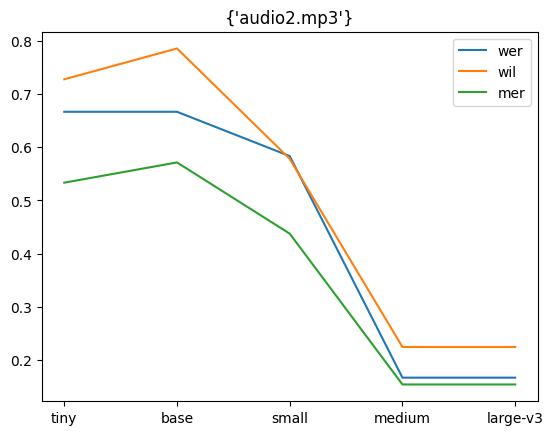

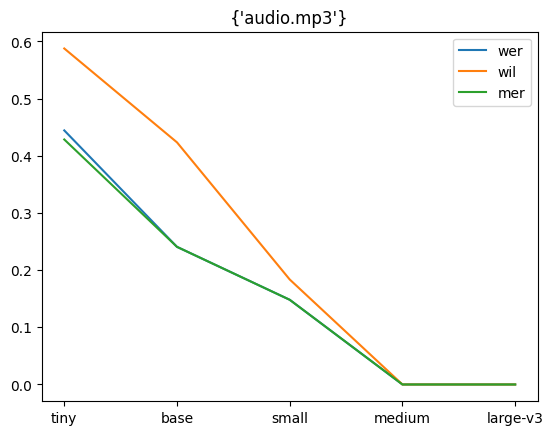

In [7]:
for a in audios:
    #plt.plot(a["model"], a["time"], label="time")
    plt.plot(a["model"], a["wer"], label="wer")
    plt.plot(a["model"], a["wil"], label="wil")
    plt.plot(a["model"], a["mer"], label="mer")
    plt.title(set(a["audio"]))
    plt.legend()
    plt.show()